In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
train_data = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN\Kowope Mart\Train.csv')
train_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [95]:
test_data = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN\Kowope Mart\Test.csv')
Submit = pd.read_csv(r'C:\Users\USER-PC\Documents\Data Science\data set\DSN\Kowope Mart\SampleSubmission.csv')

In [96]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
cat_cols = ['form_field47', 'default_status']

for col in cat_cols:
    train_data[col] = train_data[col].astype('str')
    train_data[col] = enc.fit_transform(train_data[col])

In [97]:
train_data.nunique()

Applicant_ID      56000
form_field1         449
form_field2       20015
form_field3       14617
form_field4        2927
form_field5        2991
form_field6        5846
form_field7       23199
form_field8       12820
form_field9       22650
form_field10      30942
form_field11       9508
form_field12      16778
form_field13      21960
form_field14       1237
form_field15      23783
form_field16         11
form_field17         15
form_field18         16
form_field19         26
form_field20         27
form_field21      11101
form_field22      23583
form_field23      16619
form_field24      12571
form_field25       5014
form_field26        594
form_field27        558
form_field28         95
form_field29        654
form_field30        274
form_field31        394
form_field32       2620
form_field33        554
form_field34         18
form_field35         11
form_field36         66
form_field37         52
form_field38         58
form_field39         15
form_field40       9848
form_field41    

In [98]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

# RISK SCORING FEATURES

In [99]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [100]:
Risk_Scoring_Features = train_data[['Applicant_ID', 'form_field1', 'form_field2', 'default_status']]
Risk_Scoring_Features.head(2)

,Applicant_ID,form_field1,form_field2,default_status
0,Apcnt_1000000,3436.0,0.28505,0
1,Apcnt_1000004,3456.0,0.67400,0


Text(0.5, 1.0, 'Histogram of : Customer Creditworthiness score')

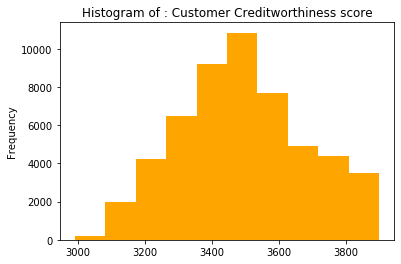

In [101]:
#filling in the modal score of 3500 will be good for form_field1
Risk_Scoring_Features['form_field1'].plot(kind = 'hist', color = 'orange')
plt.title('Histogram of : Customer Creditworthiness score')

Text(0.5, 1.0, 'Histogram of: number and riskiness of credit enquiries')

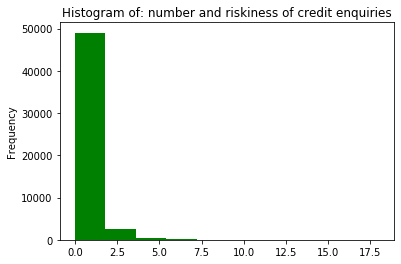

In [102]:
# Filling with the modal score or median score will be a good fit. Also scores greater than 5.0 seems like outliers
Risk_Scoring_Features['form_field2'].plot(kind = 'hist', color = 'g')
plt.title('Histogram of: number and riskiness of credit enquiries')

In [103]:
rsk = Risk_Scoring_Features.corr()
rsk

,form_field1,form_field2,default_status
form_field1,1.000000,-0.263382,-0.414826
form_field2,-0.263382,1.000000,0.226313
default_status,-0.414826,0.226313,1.000000


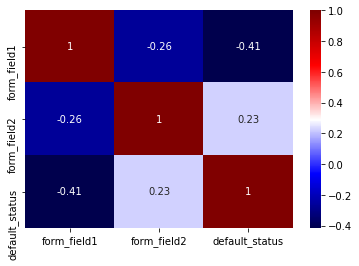

In [104]:
sns.heatmap(rsk, annot=True,cmap='seismic')

INTERESTING FACTS

Credit worthiness is a better determinant of whether a person will default than the riskiness of the borrowers enquiries. 
This is very much logical and it's tandem with the basic domain knowledge.

# SEVERITY FEATURES

In [105]:
Severity_Features = train_data[['form_field3', 'form_field4', 'form_field5', 'default_status']]
Severity_Features.head(2)

,form_field3,form_field4,form_field5,default_status
0,1.6560,0.0,0.0,0
1,0.2342,0.0,0.0,0


Text(0.5, 1.0, 'Histogram of: Severity of default by the borrower on any loan')

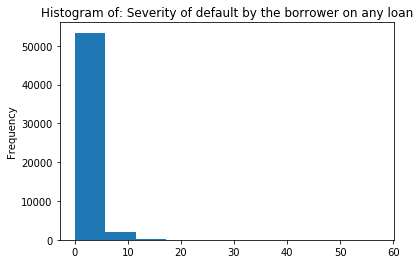

In [106]:
# the median score is the best fill for n/a values
Severity_Features['form_field3'].plot(kind = 'hist')
plt.title('Histogram of: Severity of default by the borrower on any loan')

Text(0.5, 1.0, 'Histogram of: Severity of default by the borrower on auto loan')

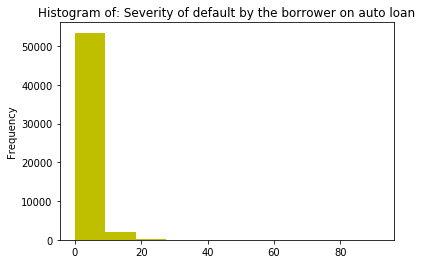

In [107]:
Severity_Features['form_field4'].plot(kind = 'hist', color = 'y')
plt.title('Histogram of: Severity of default by the borrower on auto loan')

Text(0.5, 1.0, 'Histogram of: Severity of default by the borrower on education loan')

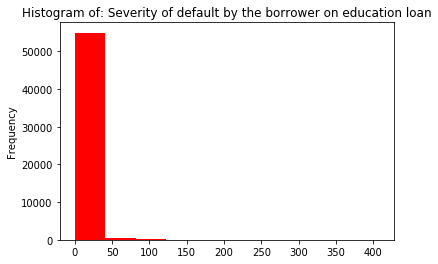

In [108]:
Severity_Features['form_field5'].plot(kind = 'hist', color = 'r')
plt.title('Histogram of: Severity of default by the borrower on education loan')

In [109]:
sev = Severity_Features.corr()
sev

,form_field3,form_field4,form_field5,default_status
form_field3,1.000000,0.376795,0.649863,0.193603
form_field4,0.376795,1.000000,0.099439,0.147548
form_field5,0.649863,0.099439,1.000000,0.088912
default_status,0.193603,0.147548,0.088912,1.000000


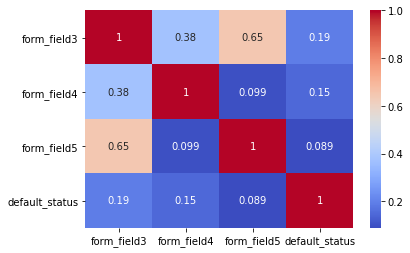

In [110]:
sns.heatmap(sev, annot=True,cmap='coolwarm')

INTERESTING FACT

None of the severity factor is an indicant of whether a borrower will default or not. 
That is amount, time since default, and number of defaults doesn't mean a borrower will default or not.

# CREDIT FEATURES

In [111]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [112]:
Credit_Features = train_data[['form_field6', 'form_field7', 'form_field8', 'form_field9', 'form_field10', 'form_field11',
                              'form_field12', 'form_field13', 'form_field14', 'form_field15', 'default_status']]
Credit_Features.head(2)

,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,default_status
0,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,0
1,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,0


In [113]:
crd = Credit_Features.corr()
crd

,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,default_status
form_field6,1.000000,0.188560,0.491946,0.256348,0.230088,0.014199,-0.060717,0.166417,0.007264,0.163450,-0.165438
form_field7,0.188560,1.000000,0.340538,0.271203,0.899833,-0.003793,0.117215,0.291038,0.007267,0.252285,-0.113481
form_field8,0.491946,0.340538,1.000000,0.583663,0.448022,-0.011155,0.171477,0.309817,0.015062,0.269589,-0.227655
form_field9,0.256348,0.271203,0.583663,1.000000,0.478816,-0.023077,0.323888,0.242528,0.002261,0.181270,-0.206441
form_field10,0.230088,0.899833,0.448022,0.478816,1.000000,-0.033408,0.182841,0.413713,0.002539,0.254315,-0.170323
form_field11,0.014199,-0.003793,-0.011155,-0.023077,-0.033408,1.000000,-0.044297,-0.034092,-0.002056,0.007284,0.033700
form_field12,-0.060717,0.117215,0.171477,0.323888,0.182841,-0.044297,1.000000,0.211821,0.001553,0.113876,-0.042858
form_field13,0.166417,0.291038,0.309817,0.242528,0.413713,-0.034092,0.211821,1.000000,0.005452,0.152648,-0.089314
form_field14,0.007264,0.007267,0.015062,0.002261,0.002539,-0.002056,0.001553,0.005452,1.000000,0.008128,0.008272
form_field15,0.163450,0.252285,0.269589,0.181270,0.254315,0.007284,0.113876,0.152648,0.008128,1.000000,-0.127264


<Figure size 1008x720 with 0 Axes>

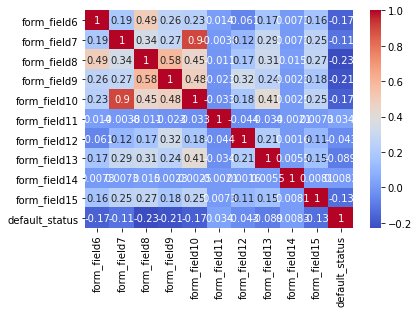

<Figure size 1008x720 with 0 Axes>

In [114]:
sns.heatmap(crd, annot=True,cmap='coolwarm')
plt.figure(figsize = (14, 10))

Text(0.5, 1, 'Relationship between credit available on all credit cards and  on customer’s active credit lines')

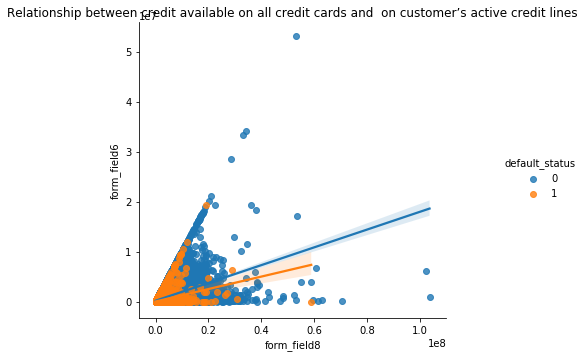

In [115]:
sns.lmplot('form_field8', 'form_field6', hue= 'default_status', data = Credit_Features)
plt.title('Relationship between credit available on all credit cards and  on customer’s active credit lines')

Text(0.5, 1, 'Total amount of credit available on accepted credit lines and  on customer’s active credit lines')

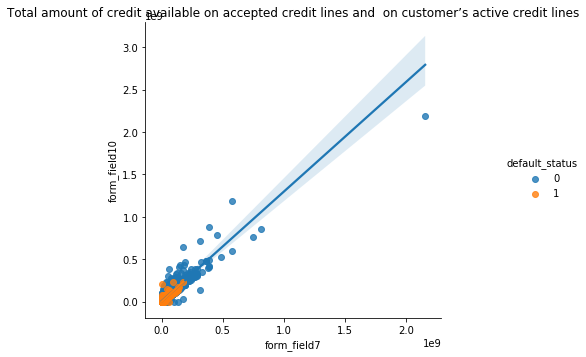

In [116]:
sns.lmplot('form_field7', 'form_field10', hue= 'default_status', data = Credit_Features)
plt.title('Total amount of credit available on accepted credit lines and  on customer’s active credit lines')

Text(0.5, 1, 'Maximum of credit available on all renewed, active credit cards and on cards with 1 missing payment')

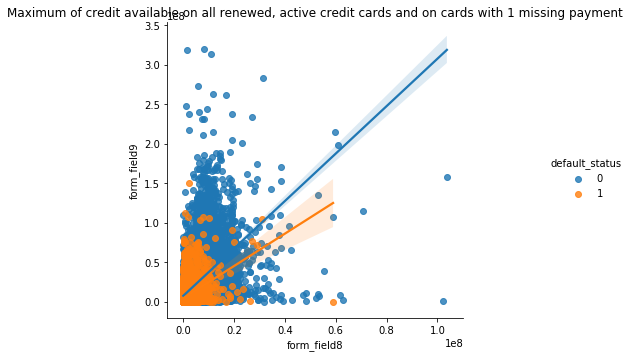

In [117]:
sns.lmplot('form_field8', 'form_field9', hue= 'default_status', data = Credit_Features)
plt.title('Maximum of credit available on all renewed, active credit cards and on cards with 1 missing payment')

Text(0.5, 1.0, 'Histogram of maximum of credit available on all active credit cards')

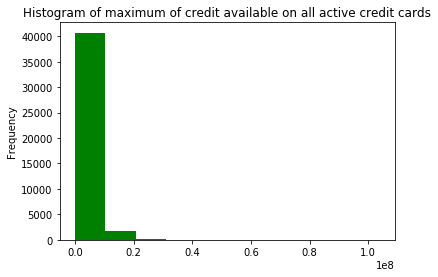

In [118]:
#form_field8 has the greatest correlation with default status
Credit_Features.form_field8.plot(kind = 'hist', color = 'green')
plt.title('Histogram of maximum of credit available on all active credit cards')

INTERESTING FACTS

The form_field14 which represents the annual income of the applicant is the weakest determinant of whether a person will default 
in the payment of loan
The form_field15 which represents the estimated market value of a property owned/used by the borrower is also not a serious determinant in the determination of a defaulter.

Therefore, we have to look into other features.
form_field8  and form_field9 have the greatest correlation  among the credit features

# CREDIT CARD FEATURES

In [119]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [120]:
Credit_card_features = train_data[['form_field16', 'form_field17', 'form_field18', 'form_field19', 'form_field20', 
                                   'form_field21', 'form_field22', 'form_field23', 'form_field24', 'form_field25',
                                   'form_field26', 'form_field27', 'default_status']]
Credit_card_features.head()

,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,default_status
0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,0
1,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,0
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,1
3,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,0
4,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,0


In [121]:
ccf = Credit_card_features.corr()
ccf

,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,default_status
form_field16,1.000000,0.935909,0.927875,0.502494,0.495305,0.426225,0.403867,0.380616,0.062396,-0.115810,-0.092916,-0.094896,0.275836
form_field17,0.935909,1.000000,0.990429,0.566954,0.557956,0.407389,0.392656,0.369181,0.051947,-0.115441,-0.083121,-0.092498,0.269507
form_field18,0.927875,0.990429,1.000000,0.563580,0.562581,0.405679,0.391611,0.369032,0.052451,-0.111248,-0.079093,-0.087540,0.265692
form_field19,0.502494,0.566954,0.563580,1.000000,0.986371,0.481584,0.436199,0.415269,0.038467,-0.107548,-0.031549,-0.049574,0.134433
form_field20,0.495305,0.557956,0.562581,0.986371,1.000000,0.477257,0.447040,0.410969,0.038683,-0.088458,-0.012484,-0.029863,0.127612
form_field21,0.426225,0.407389,0.405679,0.481584,0.477257,1.000000,0.707672,0.689351,0.149579,-0.255669,-0.266065,-0.273799,0.325634
form_field22,0.403867,0.392656,0.391611,0.436199,0.447040,0.707672,1.000000,0.912341,0.121192,-0.241410,-0.238101,-0.247902,0.322421
form_field23,0.380616,0.369181,0.369032,0.415269,0.410969,0.689351,0.912341,1.000000,0.108662,-0.234329,-0.229085,-0.239271,0.318622
form_field24,0.062396,0.051947,0.052451,0.038467,0.038683,0.149579,0.121192,0.108662,1.000000,-0.006324,-0.006814,-0.001486,0.064261
form_field25,-0.115810,-0.115441,-0.111248,-0.107548,-0.088458,-0.255669,-0.241410,-0.234329,-0.006324,1.000000,0.711715,0.759011,-0.215165


<Figure size 1008x576 with 0 Axes>

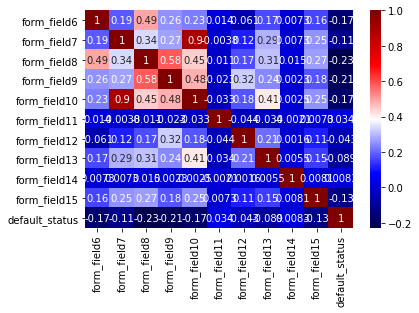

In [122]:
sns.heatmap(crd, annot=True,cmap='seismic')
plt.Figure(figsize = (14, 8))

Text(0.5, 1.0, 'Relationship between active credit cards and active credit lines on which full credit limit is utilized')

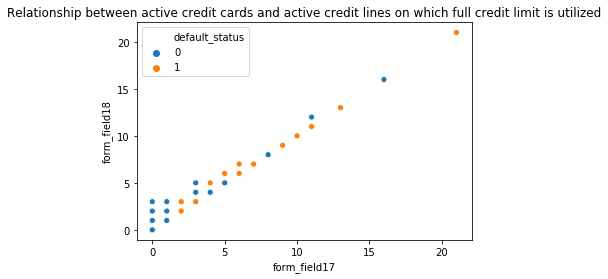

In [123]:
sns.scatterplot('form_field17', 'form_field18', hue = 'default_status', data = Credit_card_features)
plt.title('Relationship between active credit cards and active credit lines on which full credit limit is utilized')

Text(0.5, 1.0, 'Relationship between cards with full debt payment and active credit lines on which full credit limit is utilized')

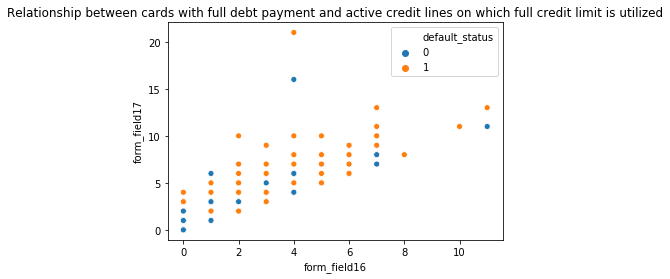

In [124]:
sns.scatterplot('form_field16', 'form_field17', hue = 'default_status', data = Credit_card_features)
plt.title('Relationship between cards with full debt payment and active credit lines on which full credit limit is utilized')

Text(0.5, 1.0, 'Relationship between cards with full debt payment and  active credit cards on which at least 75% credit limit')

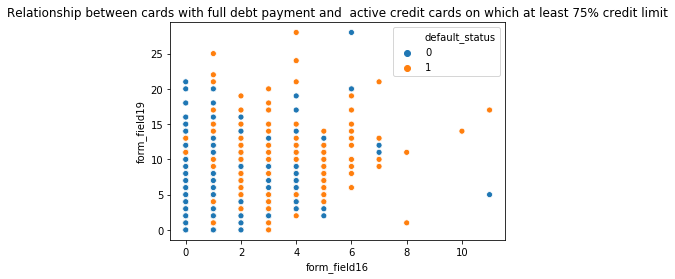

In [125]:
sns.scatterplot('form_field16', 'form_field19', hue = 'default_status', data = Credit_card_features)
plt.title('Relationship between cards with full debt payment and  active credit cards on which at least 75% credit limit')

Text(0.5, 1.0, 'Relationship between cards with full debt payment and  active credit lines on which at least 75% credit limit')

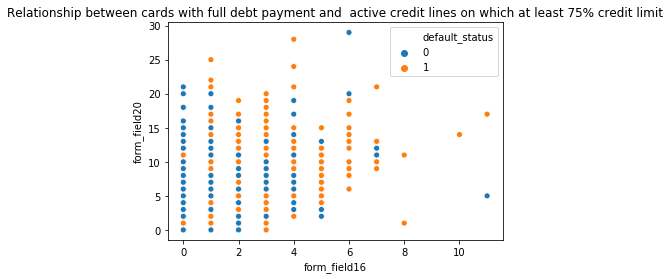

In [126]:
sns.scatterplot('form_field16', 'form_field20', hue = 'default_status', data = Credit_card_features)
plt.title('Relationship between cards with full debt payment and  active credit lines on which at least 75% credit limit')

Text(0.5, 1.0, 'Average utilization of active revolving credit card loans (%)')

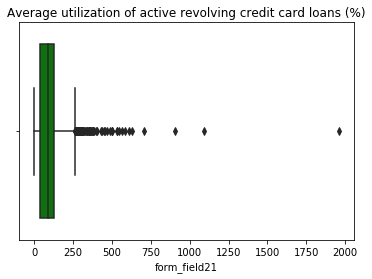

In [127]:
sns.boxplot('form_field21', data = Credit_card_features, color = 'green')
plt.title('Average utilization of active revolving credit card loans (%)')

Text(0.5, 1.0, 'Average utilization of line on all active credit lines activated in last 2 years (%)')

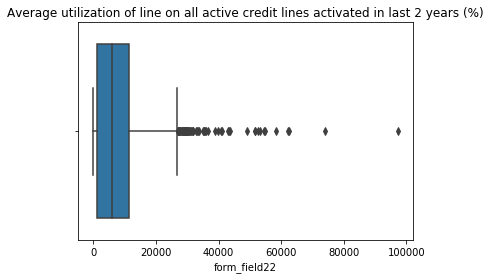

In [128]:
sns.boxplot('form_field22', data = Credit_card_features)
plt.title('Average utilization of line on all active credit lines activated in last 2 years (%)')

Text(0.5, 1.0, 'Tenure of oldest revolving credit card among all active revolving credit cards (in days)')

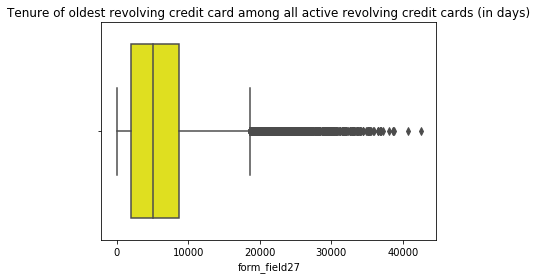

In [129]:
sns.boxplot('form_field27', data = Credit_card_features, color = 'yellow')
plt.title('Tenure of oldest revolving credit card among all active revolving credit cards (in days)')

INTERESTING FACT

The average utilization of card loans and lines is the best determinant of a defaulter with the exception of those who have have missed a payment in the last 6 months.

This is a logical conclusion.
form_field16-18, 21-23, 25 - 27

# TIME-RELATED FEATURES

In [130]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [131]:
Time_related_features = train_data[['form_field28', 'form_field29', 'form_field30', 'form_field31','form_field32', 
                                    'form_field33', 'form_field34', 'form_field35','form_field36', 'form_field37', 
                                    'form_field38', 'form_field39', 'default_status']]
Time_related_features.head()

,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,default_status
0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,0
1,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,0
2,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,1
3,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,0
4,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,0


In [132]:
trf = Time_related_features.corr()
trf

,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,default_status
form_field28,1.000000,0.100598,-0.022310,0.001779,0.198581,0.144527,-0.213228,-0.239603,-0.200214,0.122458,-0.125191,-0.141471,-0.220421
form_field29,0.100598,1.000000,0.353347,0.528414,0.627171,0.415811,0.002016,-0.092848,-0.012748,0.490349,-0.112042,-0.021222,-0.209252
form_field30,-0.022310,0.353347,1.000000,0.176361,0.263045,0.186895,-0.016940,-0.068012,-0.031171,0.276743,-0.139822,-0.018635,-0.132381
form_field31,0.001779,0.528414,0.176361,1.000000,0.177811,0.134522,0.012681,-0.058812,-0.029401,0.183831,-0.103177,0.004121,-0.118339
form_field32,0.198581,0.627171,0.263045,0.177811,1.000000,0.326356,-0.024579,-0.125550,0.029507,0.868895,-0.074994,-0.046893,-0.218091
form_field33,0.144527,0.415811,0.186895,0.134522,0.326356,1.000000,-0.013964,-0.069310,-0.071945,0.257072,-0.126889,-0.021380,-0.140934
form_field34,-0.213228,0.002016,-0.016940,0.012681,-0.024579,-0.013964,1.000000,0.412428,0.161751,-0.023993,0.101977,0.635651,0.151109
form_field35,-0.239603,-0.092848,-0.068012,-0.058812,-0.125550,-0.069310,0.412428,1.000000,0.133739,-0.122168,0.118279,0.295996,0.254479
form_field36,-0.200214,-0.012748,-0.031171,-0.029401,0.029507,-0.071945,0.161751,0.133739,1.000000,0.024493,0.577991,0.127993,0.167306
form_field37,0.122458,0.490349,0.276743,0.183831,0.868895,0.257072,-0.023993,-0.122168,0.024493,1.000000,-0.052774,-0.041691,-0.213527


<Figure size 1008x576 with 0 Axes>

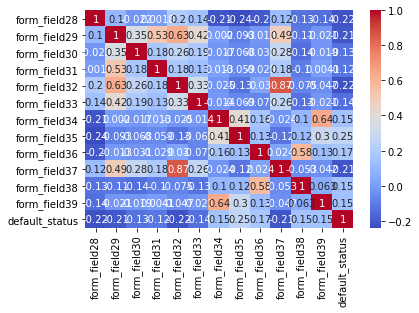

In [133]:
sns.heatmap(trf, annot=True,cmap='coolwarm')
plt.Figure(figsize = (14, 8))

Text(0.5, 1, 'Tenure of the oldest credit line vs. Maximum tenure on all education loans (in days)')

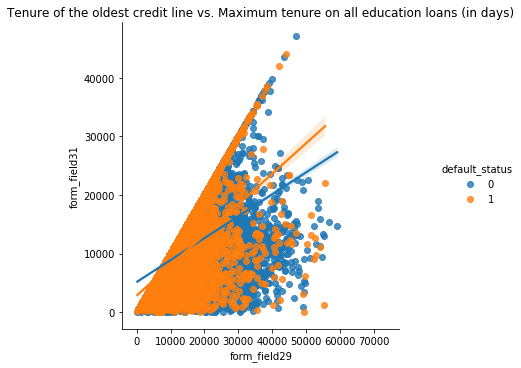

In [134]:
sns.lmplot('form_field29', 'form_field31', hue = 'default_status', data = Time_related_features)
plt.title('Tenure of the oldest credit line vs. Maximum tenure on all education loans (in days)')

Text(0.5, 1.0, 'Tenure of the oldest credit line (in days) vs. Sum of tenures (in months) of active credit cards')

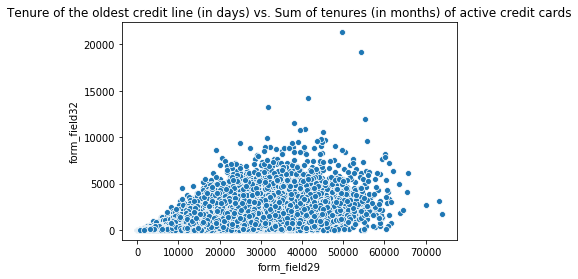

In [135]:
sns.scatterplot('form_field29', 'form_field32', data = Time_related_features)
plt.title('Tenure of the oldest credit line (in days) vs. Sum of tenures (in months) of active credit cards')

Text(0.5, 1, 'Tenure of oldest revolving credit card among all active revolving credit cards (in days)')

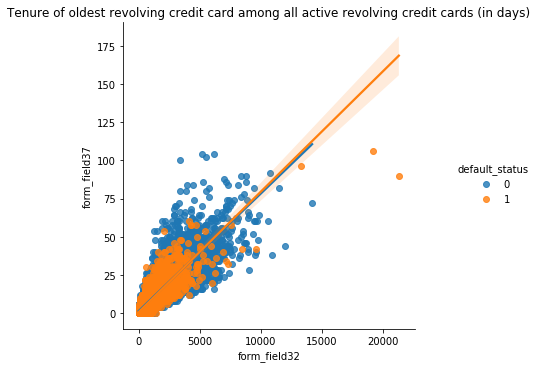

In [136]:
sns.lmplot('form_field32', 'form_field37', hue = 'default_status', data = Time_related_features)
plt.title('Tenure of oldest revolving credit card among all active revolving credit cards (in days)')

Text(0.5, 1, 'Number of active credit lines over the last 6 months vs. credit lines with current borrower delinquency')

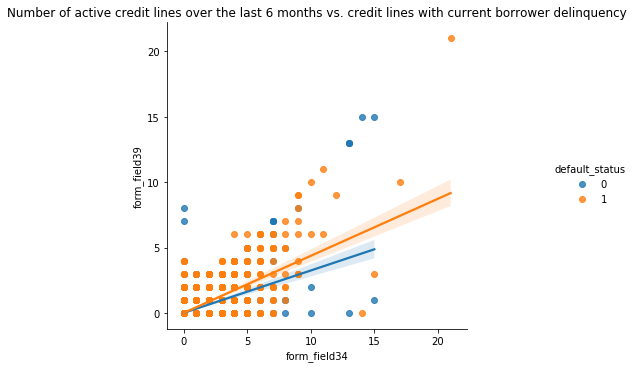

In [137]:
sns.lmplot('form_field34', 'form_field39', hue = 'default_status', data = Time_related_features)
plt.title('Number of active credit lines over the last 6 months vs. credit lines with current borrower delinquency')

Text(0.5, 1, 'Number of active credit lines vs. activated in the last 2 years')

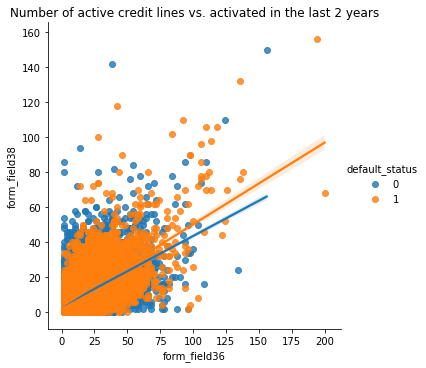

In [138]:
sns.lmplot('form_field36', 'form_field38', hue = 'default_status', data = Time_related_features)
plt.title('Number of active credit lines vs. activated in the last 2 years')

INTERESTING FACT

While the average revolving lines who has missed one payment within 6 months isn't a strong predictor, the number of revolving cards who have missed one payment is a good predictor of whether a customer will default or not.

form_fields(28, 29, 32, 35, 37) are the strongest determinants of a defaulting customer or not. 
This generally means that the length of time a customer is active and the length of time a customer misses a payment are good indicants in determining default or not.

# PERCENTAGE RELATED FEATURES

In [139]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [140]:
Percentage_related_features = train_data[['form_field40', 'form_field41', 'default_status']]
Percentage_related_features.head(2)

,form_field40,form_field41,default_status
0,NaN,NaN,0
1,NaN,NaN,0


In [141]:
Percentage_related_features.describe()

,form_field40,form_field41,default_status
count,12271.000000,17771.000000,56000.000000
mean,147.797977,108.117363,0.244911
std,45.085889,36.765769,0.430038
min,0.021000,0.000000,0.000000
25%,136.191750,87.055500,0.000000
50%,150.000000,118.441500,0.000000
75%,167.754000,137.496750,0.000000
max,645.450000,255.000000,1.000000


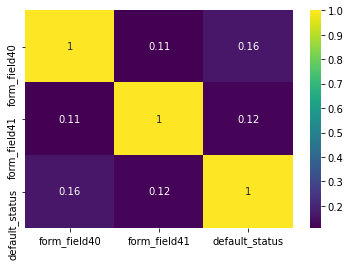

In [142]:
sns.heatmap(Percentage_related_features.corr(), annot=True,cmap='viridis')

Text(0.5, 1.0, 'Histogram of: Utilization of line on active education loans (%)')

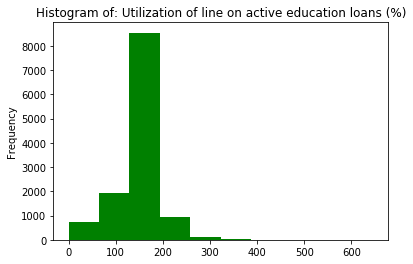

In [143]:
Percentage_related_features.form_field40.plot(kind= 'hist', color= 'green')
plt.title('Histogram of: Utilization of line on active education loans (%)')

Text(0.5, 1.0, 'Histogram of: Utilization of line on active auto loans (%)')

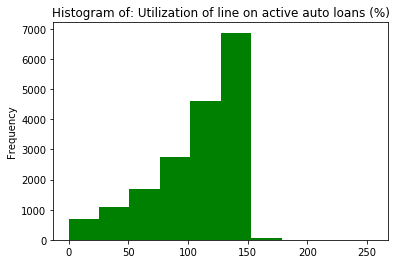

In [144]:
Percentage_related_features.form_field41.plot(kind= 'hist', color= 'green')
plt.title('Histogram of: Utilization of line on active auto loans (%)')

INTERESTING FACT

The percentage of utilization of auto and education loans have no bearing on the default status of a customer. Therefore whether a customer has used  auto and education loans doesn't mean such a one wouldn't default. The probability is low.

# OTHER FEATURES

In [145]:
train_data.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [146]:
Other_features = train_data[['form_field42', 'form_field43', 'form_field44', 'form_field45', 'form_field46', 'form_field47',
                             'form_field48', 'form_field49', 'form_field50', 'default_status']]
Other_features.head()

,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,0
1,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,0
2,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,1
3,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,0
4,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0


In [147]:
Other_features.corr()

,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
form_field42,1.000000,-0.546692,0.141101,0.266692,0.344894,-0.191486,-0.115104,0.004811,-0.077260,0.329039
form_field43,-0.546692,1.000000,-0.382969,-0.168621,-0.182756,0.116958,0.064204,0.220256,0.082062,-0.165155
form_field44,0.141101,-0.382969,1.000000,0.039464,0.006571,0.035070,-0.010821,-0.307514,0.003757,-0.066595
form_field45,0.266692,-0.168621,0.039464,1.000000,0.142558,-0.075294,-0.025605,-0.033068,-0.020328,0.154638
form_field46,0.344894,-0.182756,0.006571,0.142558,1.000000,-0.078794,-0.030958,-0.033728,-0.024810,0.196138
form_field47,-0.191486,0.116958,0.035070,-0.075294,-0.078794,1.000000,0.037481,-0.082665,0.100971,-0.227926
form_field48,-0.115104,0.064204,-0.010821,-0.025605,-0.030958,0.037481,1.000000,-0.016077,0.026207,-0.060161
form_field49,0.004811,0.220256,-0.307514,-0.033068,-0.033728,-0.082665,-0.016077,1.000000,-0.037066,0.152407
form_field50,-0.077260,0.082062,0.003757,-0.020328,-0.024810,0.100971,0.026207,-0.037066,1.000000,-0.049732
default_status,0.329039,-0.165155,-0.066595,0.154638,0.196138,-0.227926,-0.060161,0.152407,-0.049732,1.000000


Text(0.5, 1.0, 'Financial stress index of the borrower.  vs. high-risk loans ')

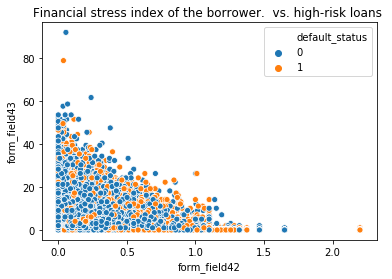

In [148]:
sns.scatterplot('form_field42', 'form_field43', hue = 'default_status', data = Other_features)
plt.title('Financial stress index of the borrower.  vs. high-risk loans ')

Text(0.5, 1.0, 'Financial stress index of the borrower vs. auto loans with 2 missednpayments')

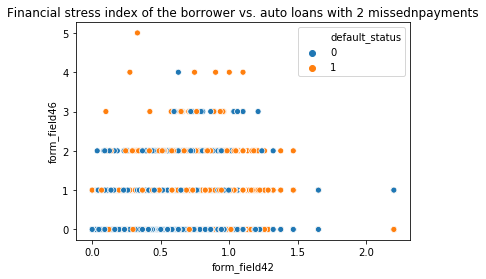

In [149]:
sns.scatterplot('form_field42', 'form_field46', hue = 'default_status', data = Other_features)
plt.title('Financial stress index of the borrower vs. auto loans with 2 missednpayments')

Text(0.5, 1.0, 'Financial stress index of the borrower')

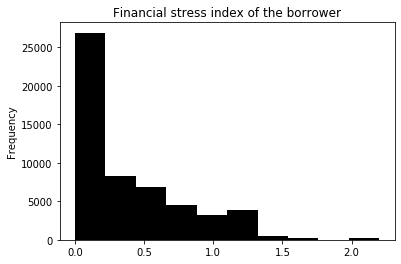

In [150]:
Other_features.form_field42.plot(kind = 'hist', color = 'black')
plt.title('Financial stress index of the borrower')

Text(0.5, 1.0, 'Pie chart of the Type of product')

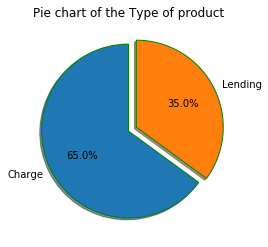

In [156]:
#Other_features.form_field47.plot(kind = 'hist', color = 'black')
labels = 'Charge', 'Lending'
explode = (0, 0.1)
plt.pie(Other_features.form_field47.value_counts(), explode=explode, labels=labels, wedgeprops={'edgecolor': 'green'}, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.Figure(figsize = (14, 8))
plt.title('Pie chart of the Type of product')

INTERESTING FACT

Financial stress index of the borrower and the type of loan obtained are good determinants of a customer's default status.
This is in agreement with theoretical knowledge as well as logical thinking.

# DEFAULT STATUS

Text(0.5, 1.0, 'Pie chart of default status')

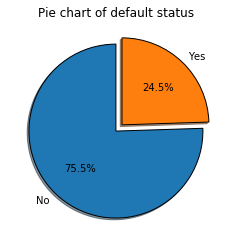

In [154]:
#train_data.default_status.plot(kind = 'hist', color = 'orange')
labels = 'No', 'Yes'
explode = (0, 0.1)
plt.pie(train_data.default_status.value_counts(), explode=explode, labels=labels, 
        wedgeprops={'edgecolor': 'black'},autopct='%1.1f%%', shadow=True, startangle=90)
plt.Figure(figsize = (14, 8))
plt.title('Pie chart of default status')

# DATA CLEANING AND FEATURE SELECTION

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [51]:
train_set = train_data.drop(['Applicant_ID', 'form_field11', 'form_field23', 'form_field40', 'form_field41','form_field45'], 1 )
train_set.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field42,form_field43,form_field44,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.0,0.392854,2.02,0.711632,0.0,0,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.0,0.314281,8.08,0.183584,0.0,0,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.0,0.162965,18.18,0.791136,0.0,0,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,1.0,0.488884,2.02,0.685168,0.0,0,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.0,0.275000,12.12,0.438168,0.0,0,97.887502,1.427891,0.045630,0


In [52]:
train_set.nunique()

form_field1         449
form_field2       20015
form_field3       14617
form_field4        2927
form_field5        2991
form_field6        5846
form_field7       23199
form_field8       12820
form_field9       22650
form_field10      30942
form_field12      16778
form_field13      21960
form_field14       1237
form_field15      23783
form_field16         11
form_field17         15
form_field18         16
form_field19         26
form_field20         27
form_field21      11101
form_field22      23583
form_field24      12571
form_field25       5014
form_field26        594
form_field27        558
form_field28         95
form_field29        654
form_field30        274
form_field31        394
form_field32       2620
form_field33        554
form_field34         18
form_field35         11
form_field36         66
form_field37         52
form_field38         58
form_field39         15
form_field42        986
form_field43         59
form_field44      33238
form_field46          6
form_field47    

In [53]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   form_field1     53471 non-null  float64
 1   form_field2     52156 non-null  float64
 2   form_field3     55645 non-null  float64
 3   form_field4     55645 non-null  float64
 4   form_field5     55645 non-null  float64
 5   form_field6     42640 non-null  float64
 6   form_field7     50837 non-null  float64
 7   form_field8     42640 non-null  float64
 8   form_field9     47992 non-null  float64
 9   form_field10    55645 non-null  float64
 10  form_field12    46105 non-null  float64
 11  form_field13    50111 non-null  float64
 12  form_field14    56000 non-null  int64  
 13  form_field15    33525 non-null  float64
 14  form_field16    42964 non-null  float64
 15  form_field17    44849 non-null  float64
 16  form_field18    45598 non-null  float64
 17  form_field19    55996 non-null 

In [54]:
train_set.drop_duplicates(inplace = True)
train_set.duplicated().any()

False

In [55]:
train_data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,0,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,0,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,0,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,0,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630,0


In [56]:
train_data = train_data.fillna(-999)

In [57]:
train_data.head(2)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,0,-999.00000,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,-999.0,0.0,0,349.80573,1.620483,0.322436,0


# TRAINING THE MODEL

# PREDICTING ON THE TEST DATA

from sklearn.model_selection import train_test_split

X = train_set.drop(['default_status', 'form_field32', 'form_field16' ], 1)
y = train_set['default_status']

In [58]:
X = train_data.drop(['Applicant_ID', 'default_status',  'form_field32', 'form_field50', 'form_field12', 'form_field48'], 1)
y = train_data['default_status']

In [59]:
X.shape

(56000, 46)

In [60]:
enc = preprocessing.LabelEncoder()
cat_cols = ['form_field47']

for col in cat_cols:
    test_data[col] = test_data[col].astype('str')
    test_data[col] = enc.fit_transform(test_data[col])

In [61]:
test_data = test_data.fillna(-999)
test_data.head(2)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,0,-999.0,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,1,-999.0,0.504974,0.043525


In [62]:
test_x = test_data.drop(['Applicant_ID', 'form_field32', 'form_field50', 'form_field12', 'form_field48'], 1) 
                         
#Catboost drop: 'form_field48', 'form_field50', 'form_field23'], 1)

test_set = test_data[['form_field1', 'form_field2', 'form_field8', 'form_field9', 'form_field10', 'form_field16', 
                      'form_field17', 'form_field18', 'form_field21','form_field22', 'form_field23', 'form_field25', 
                      'form_field26','form_field27', 'form_field28','form_field29', 'form_field32','form_field35', 
                      'form_field37','form_field42', 'form_field46', 'form_field47']]
test_set.head(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42)

In [63]:
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.metrics import roc_auc_score, accuracy_score
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import LeaveOneOut, StratifiedKFold, cross_val_score

In [64]:
roc_score = []
test_pred = []
score = 0
test_oofs =[]
n_splits = 16 #10, 8, 15, 18

fold = StratifiedKFold(n_splits)
i = 1
for i, (train_index, test_index) in enumerate(fold.split(X, y)):
    print('{} of KFold {}'.format(i, fold.n_splits))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    '''model = GradientBoostingClassifier(loss='exponential',learning_rate=0.01,subsample=1.0, n_estimators = 8000, 
                                 min_samples_split=1000, min_samples_leaf=50, max_depth = 8, validation_fraction=0.19,
                                 n_iter_no_change= 800, max_features = 'log2', random_state = 10, verbose = True)'''
    
    model = CatBoostClassifier(learning_rate=0.01, subsample=0.9, n_estimators = 80000, max_depth = 8, random_seed = 200, 
                               verbose = True, random_strength= 4, l2_leaf_reg= 6, objective = 'CrossEntropy', eval_metric='AUC',
                               use_best_model=True)
    
    '''model.fit(X_train, y_train)'''  
    
    model.fit(X_train, y_train, eval_set = [(X_test, y_test)], early_stopping_rounds = 1000, 
              verbose = 200, use_best_model=True)
    preds = model.predict_proba(X_test)[:, 1]
    sc = roc_auc_score(y_test, preds)
    roc_score.append(roc_auc_score(y_test, preds))
    score += sc/n_splits
    
    
    predictions = model.predict_proba(test_x)[:, 1]
    test_oofs.append(predictions)
    
print()
print()
print('Avg log:', roc_score)

0 of KFold 16
0:	test: 0.7889496	best: 0.7889496 (0)	total: 172ms	remaining: 3h 49m 58s
200:	test: 0.8206945	best: 0.8206945 (200)	total: 16.2s	remaining: 1h 47m 7s
400:	test: 0.8244839	best: 0.8245095 (394)	total: 31.7s	remaining: 1h 45m
600:	test: 0.8262127	best: 0.8262172 (599)	total: 47.5s	remaining: 1h 44m 36s
800:	test: 0.8271743	best: 0.8271752 (797)	total: 1m 2s	remaining: 1h 43m 43s
1000:	test: 0.8278723	best: 0.8278723 (1000)	total: 1m 18s	remaining: 1h 43m 42s
1200:	test: 0.8289557	best: 0.8289557 (1200)	total: 1m 34s	remaining: 1h 43m 40s
1400:	test: 0.8300493	best: 0.8300661 (1398)	total: 1m 51s	remaining: 1h 43m 54s
1600:	test: 0.8306594	best: 0.8306594 (1598)	total: 2m 6s	remaining: 1h 43m 33s
1800:	test: 0.8309844	best: 0.8309998 (1798)	total: 2m 22s	remaining: 1h 43m 9s
2000:	test: 0.8312705	best: 0.8313146 (1986)	total: 2m 38s	remaining: 1h 42m 57s
2200:	test: 0.8313676	best: 0.8313702 (2189)	total: 2m 54s	remaining: 1h 42m 40s
2400:	test: 0.8315548	best: 0.8315839 (2

3400:	test: 0.8368642	best: 0.8370730 (2579)	total: 4m 28s	remaining: 1h 40m 54s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.8370729842
bestIteration = 2579

Shrink model to first 2580 iterations.
5 of KFold 16
0:	test: 0.7782584	best: 0.7782584 (0)	total: 104ms	remaining: 2h 18m 3s
200:	test: 0.8307914	best: 0.8307914 (200)	total: 16.7s	remaining: 1h 50m 31s
400:	test: 0.8351763	best: 0.8351763 (400)	total: 32.3s	remaining: 1h 46m 50s
600:	test: 0.8373109	best: 0.8373109 (600)	total: 47.9s	remaining: 1h 45m 25s
800:	test: 0.8384738	best: 0.8384738 (800)	total: 1m 3s	remaining: 1h 44m 33s
1000:	test: 0.8395193	best: 0.8395193 (1000)	total: 1m 18s	remaining: 1h 43m 40s
1200:	test: 0.8407065	best: 0.8407250 (1198)	total: 1m 34s	remaining: 1h 43m 20s
1400:	test: 0.8419369	best: 0.8419934 (1394)	total: 1m 50s	remaining: 1h 43m 3s
1600:	test: 0.8424985	best: 0.8425280 (1593)	total: 2m 6s	remaining: 1h 43m 2s
1800:	test: 0.8424473	best: 0.8425550 (1608)	total: 2m 22

2000:	test: 0.8376006	best: 0.8378738 (1783)	total: 2m 35s	remaining: 1h 40m 52s
2200:	test: 0.8373233	best: 0.8378738 (1783)	total: 2m 51s	remaining: 1h 40m 49s
2400:	test: 0.8370227	best: 0.8378738 (1783)	total: 3m 6s	remaining: 1h 40m 32s
2600:	test: 0.8369873	best: 0.8378738 (1783)	total: 3m 22s	remaining: 1h 40m 14s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.8378738492
bestIteration = 1783

Shrink model to first 1784 iterations.
10 of KFold 16
0:	test: 0.7725917	best: 0.7725917 (0)	total: 94ms	remaining: 2h 5m 23s
200:	test: 0.8156940	best: 0.8156940 (200)	total: 15.8s	remaining: 1h 44m 47s
400:	test: 0.8194169	best: 0.8194169 (400)	total: 31.1s	remaining: 1h 43m 1s
600:	test: 0.8215073	best: 0.8215073 (600)	total: 46.7s	remaining: 1h 42m 55s
800:	test: 0.8231426	best: 0.8231581 (799)	total: 1m 2s	remaining: 1h 42m 42s
1000:	test: 0.8242878	best: 0.8243068 (999)	total: 1m 18s	remaining: 1h 43m 52s
1200:	test: 0.8255139	best: 0.8255139 (1200)	total: 1m 36

1000:	test: 0.8429997	best: 0.8429997 (1000)	total: 1m 41s	remaining: 2h 13m 18s
1200:	test: 0.8451833	best: 0.8451983 (1199)	total: 1m 59s	remaining: 2h 11m 6s
1400:	test: 0.8470750	best: 0.8470780 (1398)	total: 2m 19s	remaining: 2h 10m 11s
1600:	test: 0.8479546	best: 0.8480009 (1598)	total: 2m 37s	remaining: 2h 8m 19s
1800:	test: 0.8484403	best: 0.8484403 (1800)	total: 2m 54s	remaining: 2h 6m
2000:	test: 0.8485700	best: 0.8485920 (1934)	total: 3m 10s	remaining: 2h 4m 3s
2200:	test: 0.8488042	best: 0.8488717 (2192)	total: 3m 28s	remaining: 2h 2m 33s
2400:	test: 0.8486940	best: 0.8488810 (2235)	total: 3m 48s	remaining: 2h 3m 8s
2600:	test: 0.8483507	best: 0.8488810 (2235)	total: 4m 5s	remaining: 2h 1m 47s
2800:	test: 0.8483662	best: 0.8488810 (2235)	total: 4m 22s	remaining: 2h 44s
3000:	test: 0.8483574	best: 0.8488810 (2235)	total: 4m 42s	remaining: 2h 58s
3200:	test: 0.8484319	best: 0.8488810 (2235)	total: 5m 2s	remaining: 2h 46s
Stopped by overfitting detector  (1000 iterations wait)

In [65]:
f"{n_splits} fold CV, score: {score}"

'16 fold CV, score: 0.8420588769282892'

In [66]:
oof_prediction = pd.DataFrame(test_oofs).T

In [67]:
oof_prediction.columns = ['fold_' + str(i) for i in range(1, n_splits + 1)]
oof_prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10,fold_11,fold_12,fold_13,fold_14,fold_15,fold_16
0,0.267591,0.279958,0.298322,0.249829,0.266349,0.272263,0.251185,0.260712,0.287089,0.261015,0.315352,0.278006,0.286870,0.273155,0.280413,0.249390
1,0.354773,0.339778,0.368340,0.334212,0.335546,0.360131,0.385295,0.483912,0.338888,0.412886,0.245957,0.378326,0.383463,0.409633,0.346891,0.330718
2,0.379185,0.385897,0.389699,0.404654,0.401534,0.433242,0.401229,0.392582,0.438911,0.382358,0.425890,0.394428,0.384775,0.357358,0.364089,0.377191
3,0.709831,0.722839,0.720409,0.753718,0.711514,0.729447,0.739648,0.733836,0.721052,0.707674,0.746516,0.746574,0.698962,0.708466,0.704218,0.722584
4,0.167092,0.153059,0.180358,0.168105,0.168172,0.154382,0.154264,0.156750,0.108888,0.149476,0.200327,0.169023,0.171432,0.182575,0.188969,0.165339


In [68]:
Submit['default_status'] = np.mean(oof_prediction, axis =1)

In [69]:
Submit.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.273594
1,Apcnt_1000048,0.363047
2,Apcnt_1000052,0.394564
3,Apcnt_1000076,0.723580
4,Apcnt_1000080,0.164888


In [70]:
Submit.to_csv('prebootcampsubmission6.csv', index = False)